In [1]:
import cv2
import numpy as np
def loadTrainData(image_path, label_path):
    with open(image_path, 'rb') as image_data:
        images = np.frombuffer(image_data.read(), dtype=np.uint8, offset=16)
        print(images.shape)
    with open(label_path, 'rb') as label_data:
        labels = np.frombuffer(label_data.read(), dtype=np.uint8, offset=8)
    return images.reshape(-1, 784), labels

In [2]:
train_x, train_y = loadTrainData(
    'c:/data/fashion-mnist/train-images-idx3-ubyte',
    'c:/data/fashion-mnist/train-labels-idx1-ubyte'
)
test_x, test_y = loadTrainData(
    'c:/data/fashion-mnist/t10k-images-idx3-ubyte',
    'c:/data/fashion-mnist/t10k-labels-idx1-ubyte'
)

(47040000,)
(7840000,)


In [3]:
#라벨링
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

In [4]:
knn = cv2.ml.KNearest_create() # knn 모형
retval = knn.train(train_x.astype(np.float32), 
                   cv2.ml.ROW_SAMPLE, 
                   train_y.astype(np.int32))
count = 500
retval, results, neighborResponses, dist = knn.findNearest(
    test_x[:count].astype(np.float32), k=7
)
matches = results.astype(np.uint8) == test_y[:count][:, None]
print(np.count_nonzero(matches) / count * 100)

87.4


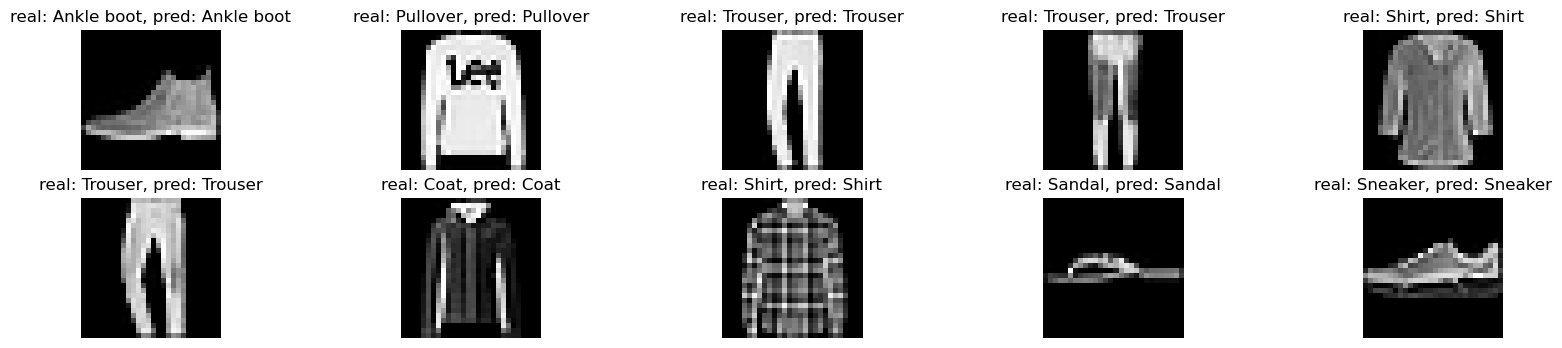

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for idx, result in enumerate(results[:10]):
    plt.subplot(2, 5, idx+1)
    plt.imshow(test_x[idx].reshape(28,28,1), cmap='gray')
    plt.title(f'real: {label_dict[test_y[idx]]}, pred: {label_dict[int(result)]}')
    plt.axis("off")
plt.show()